In [1]:
import pickle
from ddm_ex22_utils import *
import numpy as np
import matplotlib.pyplot as plt
import re
from scipy import stats
from joblib import Parallel, delayed
from scipy.stats import mode

# Case-1: Wide range for v=2,a=2

In [2]:
# Save data to files first
v = 2; a = 2
sim_data_to_files(v,a)

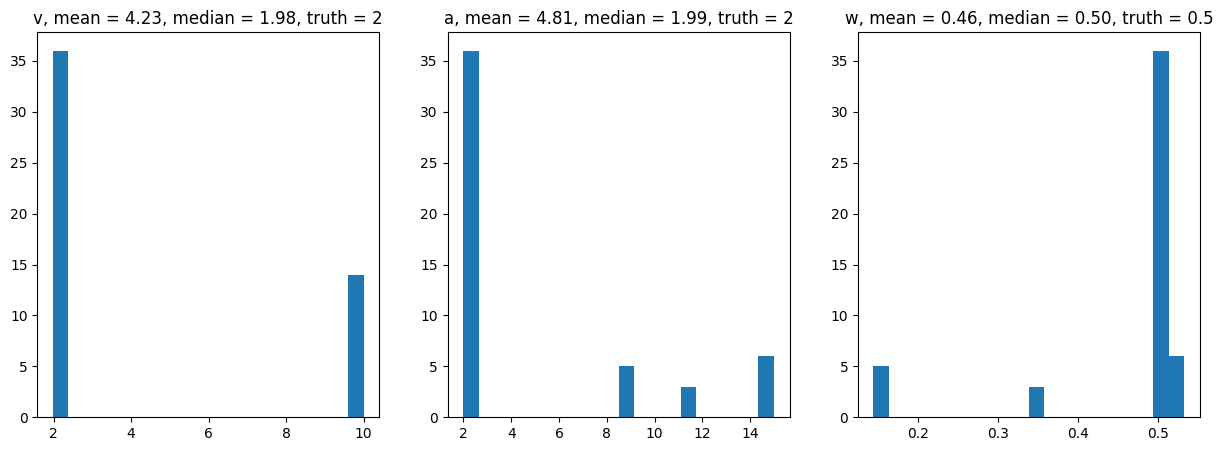

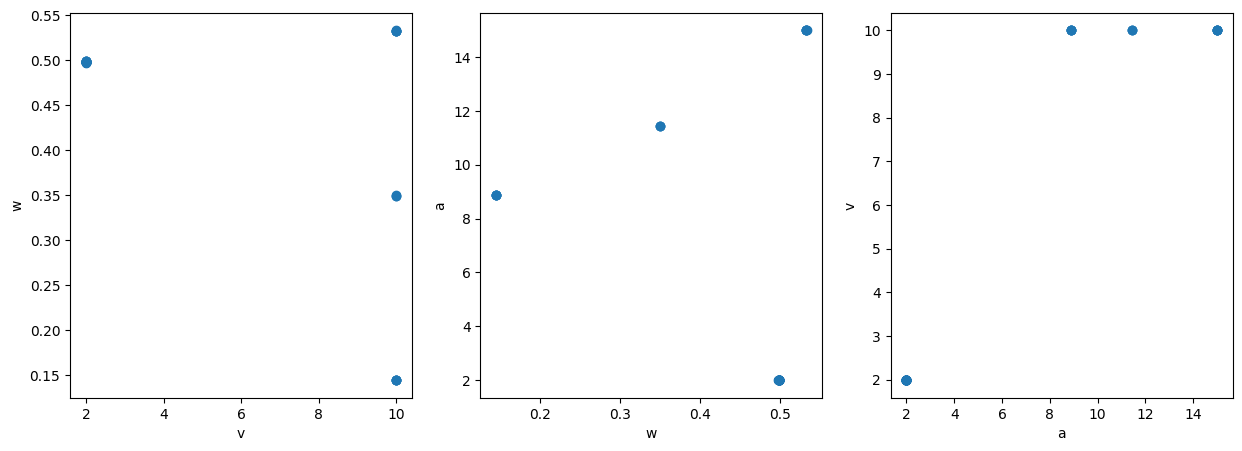

In [3]:
lb = np.array([-10, 0.01, 0.1]); ub = np.array([10, 15, 0.9])
plb = np.array([-7,0.1,0.15]); pub = np.array([7,7,0.85])

N_iter = 50

run_bads_N_iter(lb,ub,plb,pub,N_iter,v,a)

## In 2nd graph, with increasing "a", "w" is also increasing. But "v" is kept constant. This might be because of the velocity can't increase further due to the specified bounds. So, for a bigger "v" bounds and smaller "w" bounds, we should get increasing "v" vs "a" with same "w" instead of increasing "w" vs "a" with same "v"(Case 2, Case 4)

# Case 2: v = -2, a = 2

In [2]:
# Save data to files first
v = -2; a = 2
sim_data_to_files(v,a)

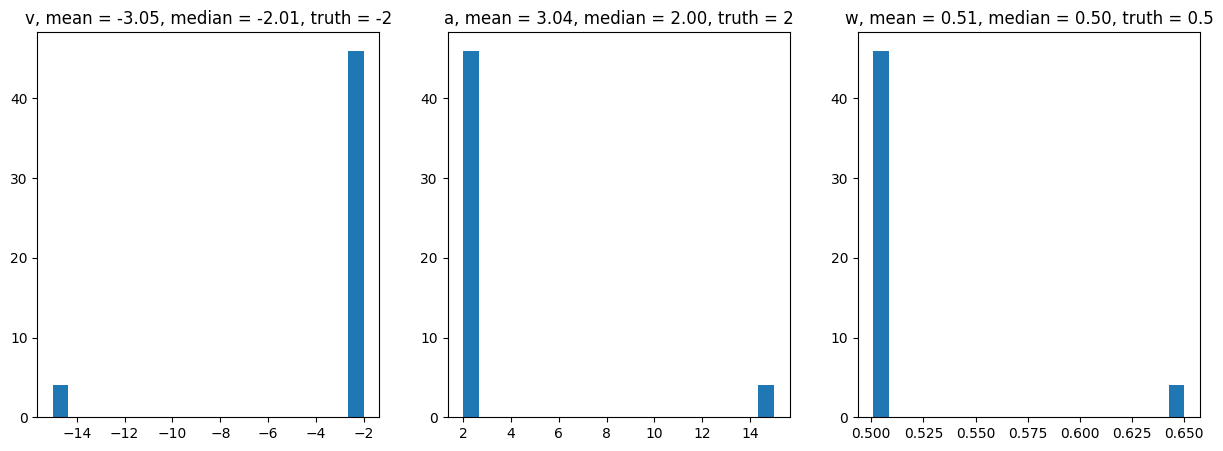

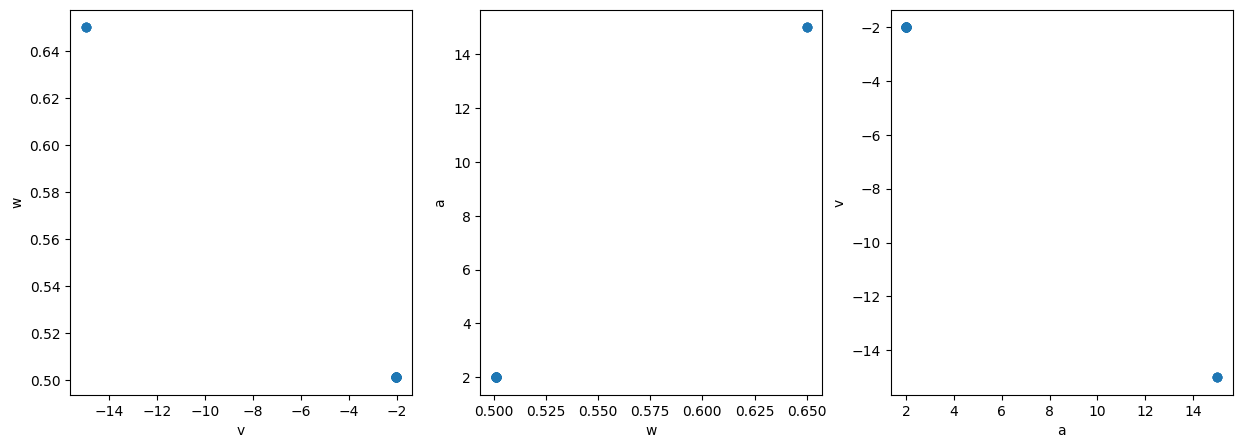

In [3]:
lb = np.array([-15, 0.01, 0.35]); ub = np.array([15, 15, 0.65])
plb = np.array([-7,0.1,0.4]); pub = np.array([7,7,0.6])

N_iter = 50

run_bads_N_iter(lb,ub,plb,pub,N_iter,v,a)

# Case 3: same wide range for v = 0, a = 2

In [4]:
# Save data to files first
v = 0; a = 2
sim_data_to_files(v,a)

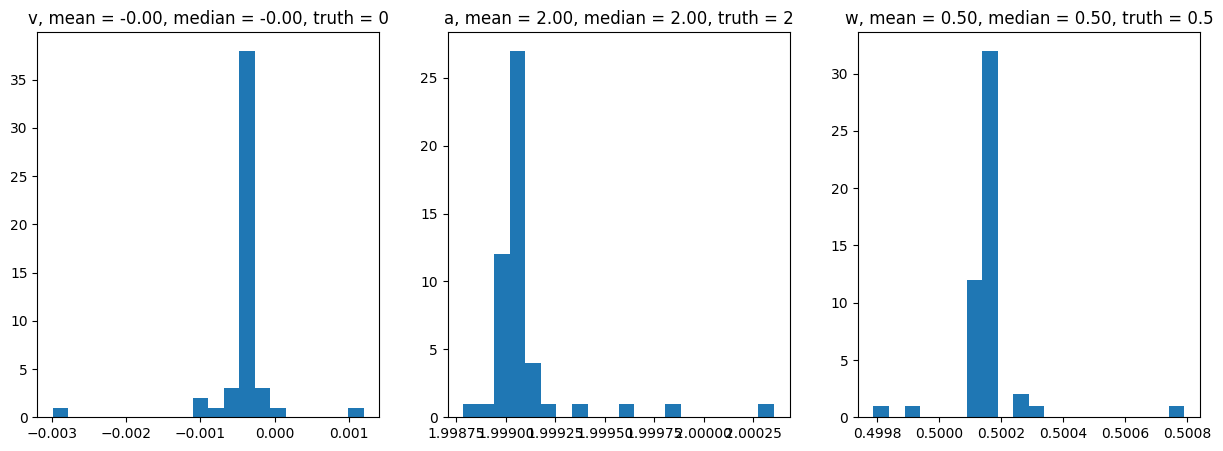

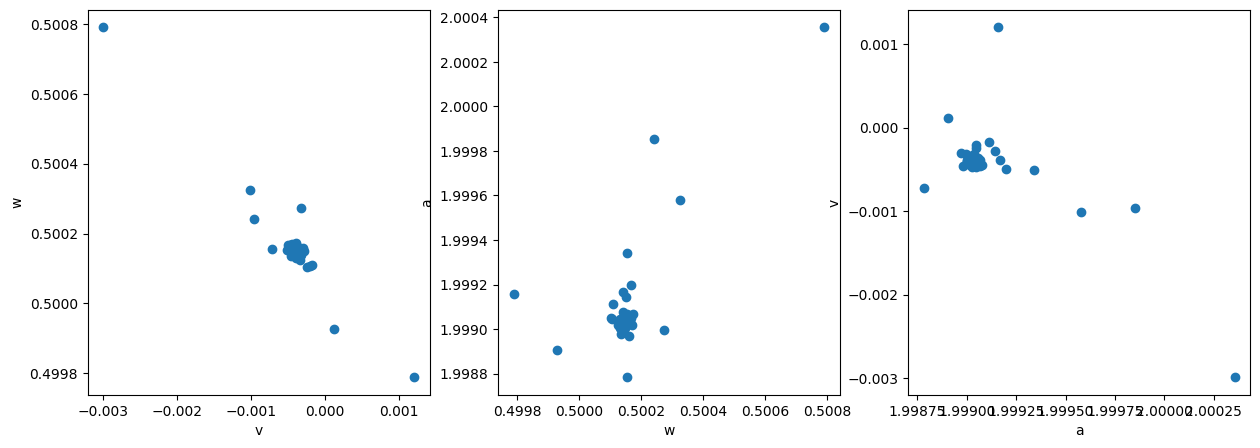

In [5]:
lb = np.array([-10, 0.01, 0.1]); ub = np.array([10, 15, 0.9])
plb = np.array([-7,0.1,0.15]); pub = np.array([7,7,0.85])

N_iter = 50

run_bads_N_iter(lb,ub,plb,pub,N_iter,v,a)

# Case 4: Completely restricting w = 0.5

In [7]:
# Save data to files first
v = 1; a = 2
sim_data_to_files(v,a)

bads:meshOverflow 	 The mesh attempted to expand above maximum size too many times. Try widening plausible_lower_bounds and plausible_upper_bounds.


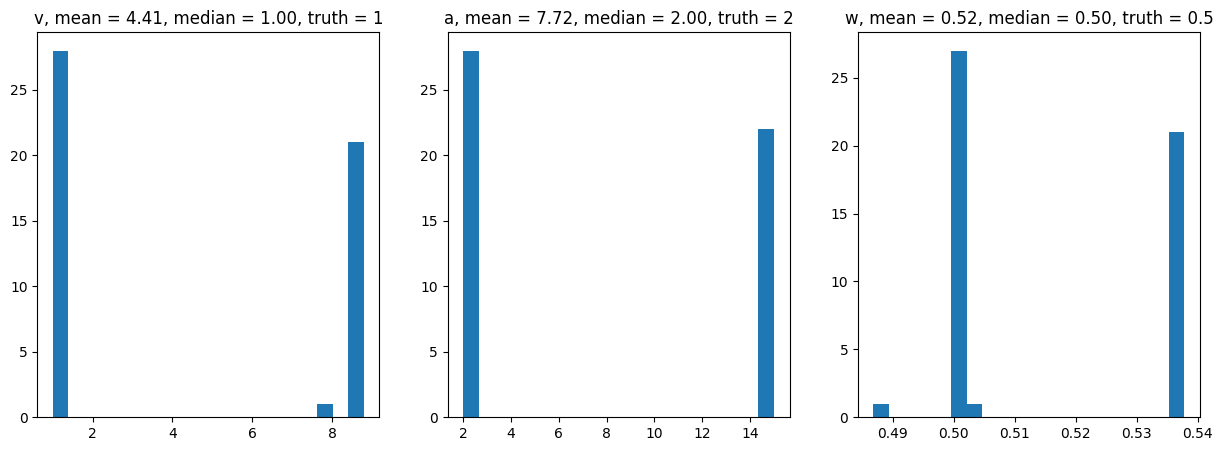

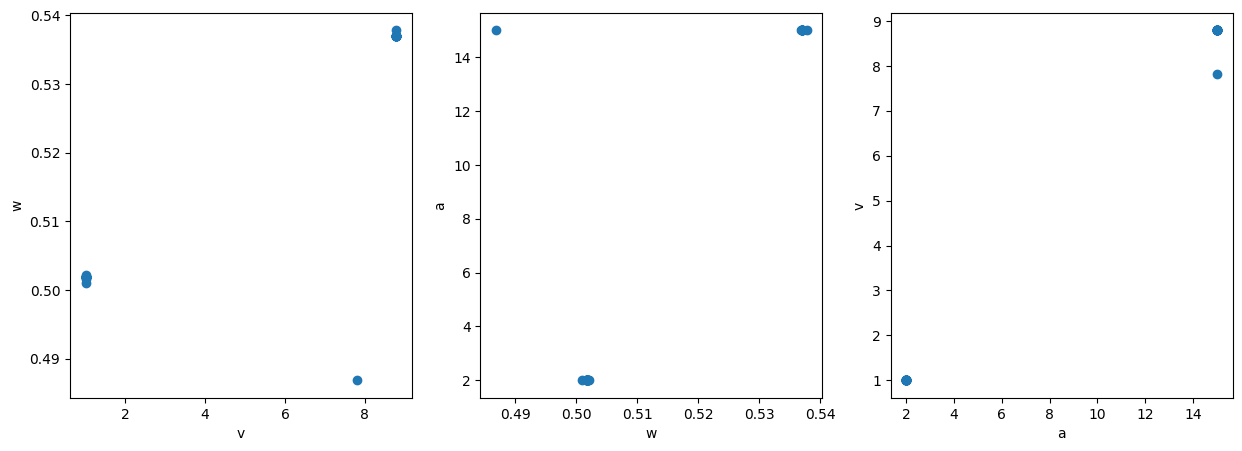

In [8]:
lb = np.array([-10, 0.01, 0.45]); ub = np.array([10, 15, 0.55])
plb = np.array([-7,0.1,0.47]); pub = np.array([7,7,0.53])

N_iter = 50

run_bads_N_iter(lb,ub,plb,pub,N_iter,v,a)

# Larger bound doesn't work for a = 10,v=0 (this is done after checking effect of N on same bounds)

/home/rka/.local/lib/python3.10/site-packages/scipy/stats/_morestats.py:1813: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


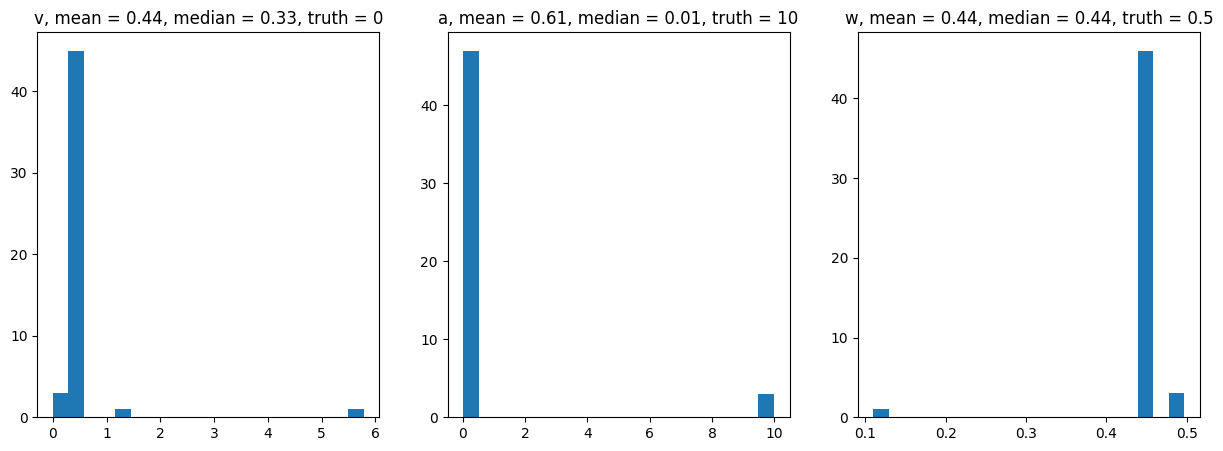

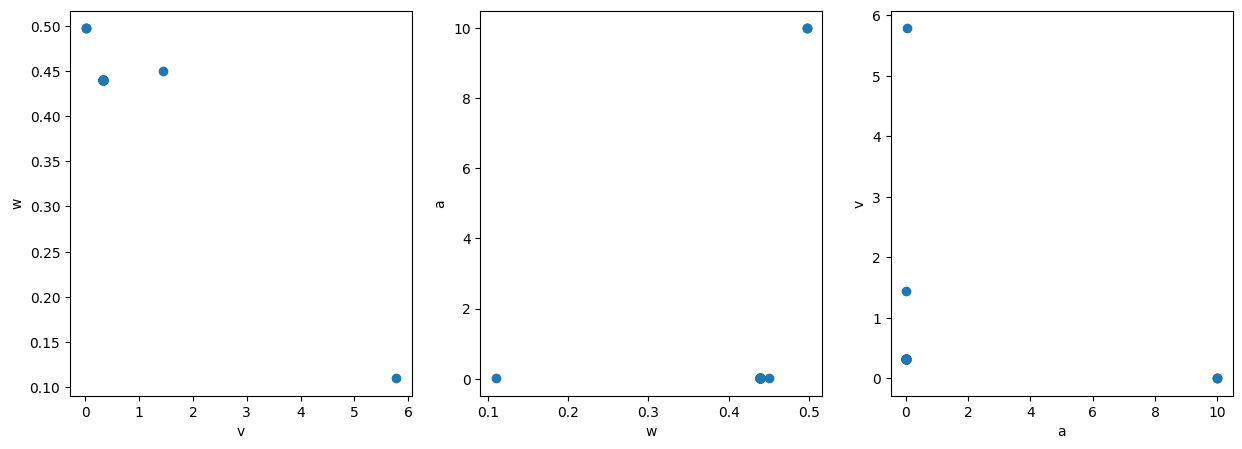

In [12]:
v = 0; a = 10
sim_data_to_files(v,a)

lb = np.array([-10, 0.01, 0.1]); ub = np.array([10, 15, 0.9])
plb = np.array([-7,0.1,0.15]); pub = np.array([7,12,0.85])


N_iter = 50
run_bads_N_iter(lb,ub,plb,pub,N_iter,v,a)

# Effect of N: Larger bound on v = 0;a = 10 (doesn't work)

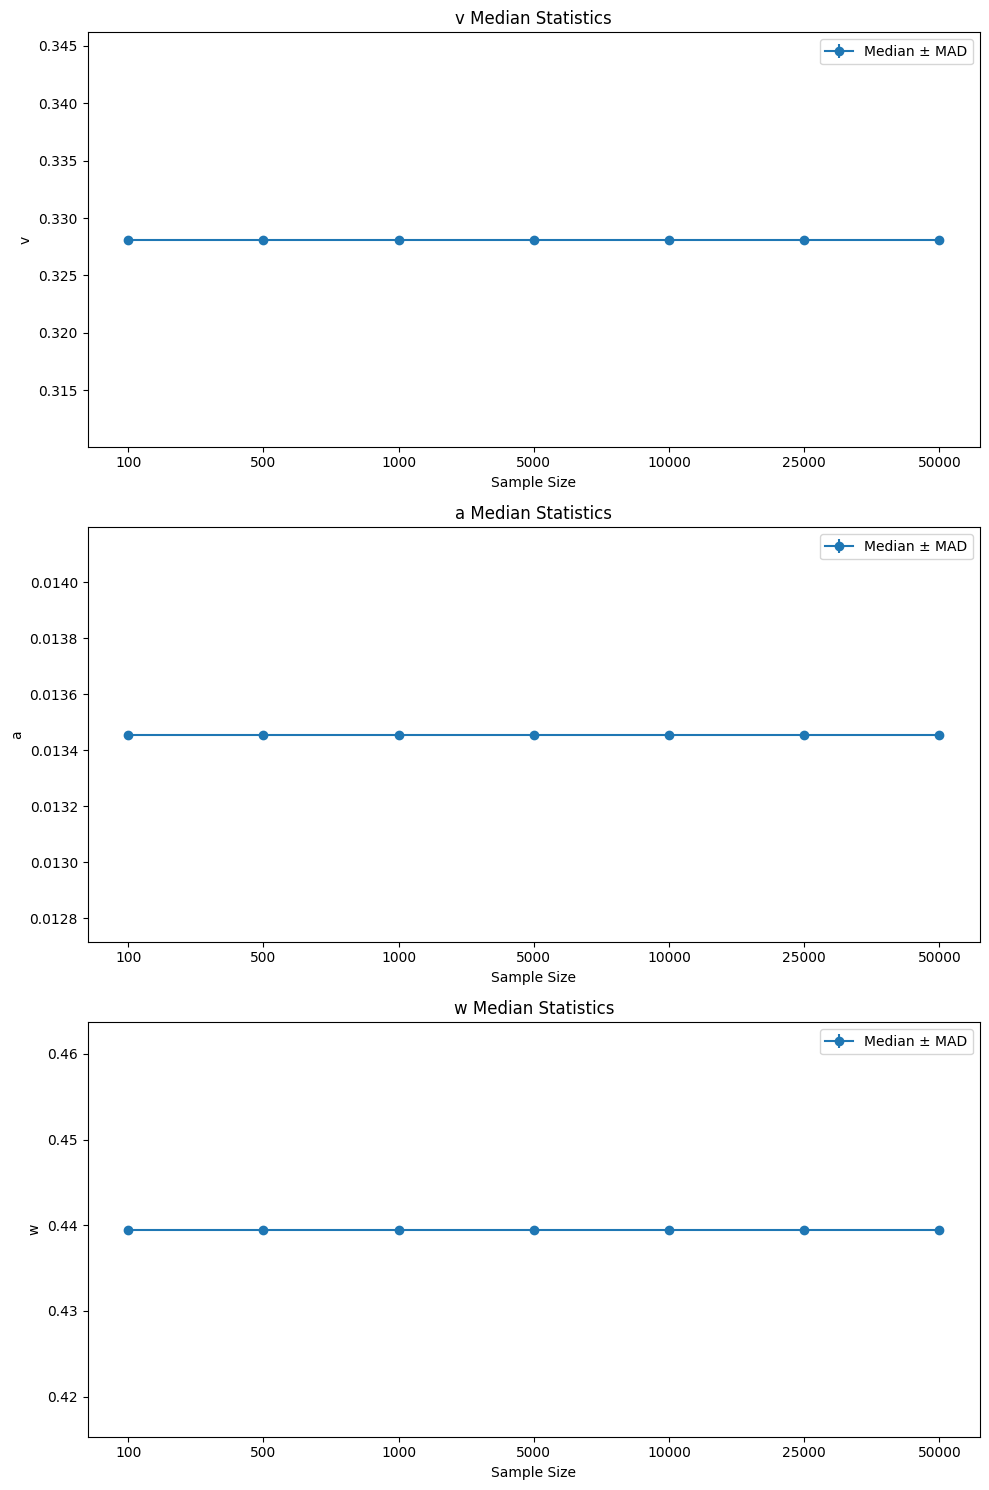

In [9]:
v = 0; a = 10

lb = np.array([-10, 0.01, 0.1]); ub = np.array([10, 15, 0.9])
plb = np.array([-7,0.1,0.15]); pub = np.array([7,12,0.85])
N_sample_sizes = [100, 500, 1000, 5000, 10000, 25000, 50000]

bads_sim_results = {}
for n in N_sample_sizes:
    print(f"Processing {n}")
    sim_data_to_files_N(v,a,n)
    bads_sim_results[n] = bads_vs_N(lb,ub,plb,pub,n,v,a)

plot_bads_vs_N_median(bads_sim_results)

# Better bounds for a = 10 (works)

Processing 100
Processing 500
Processing 1000
Processing 2500
Processing 5000
Processing 10000
Processing 25000
Processing 35000
Processing 50000


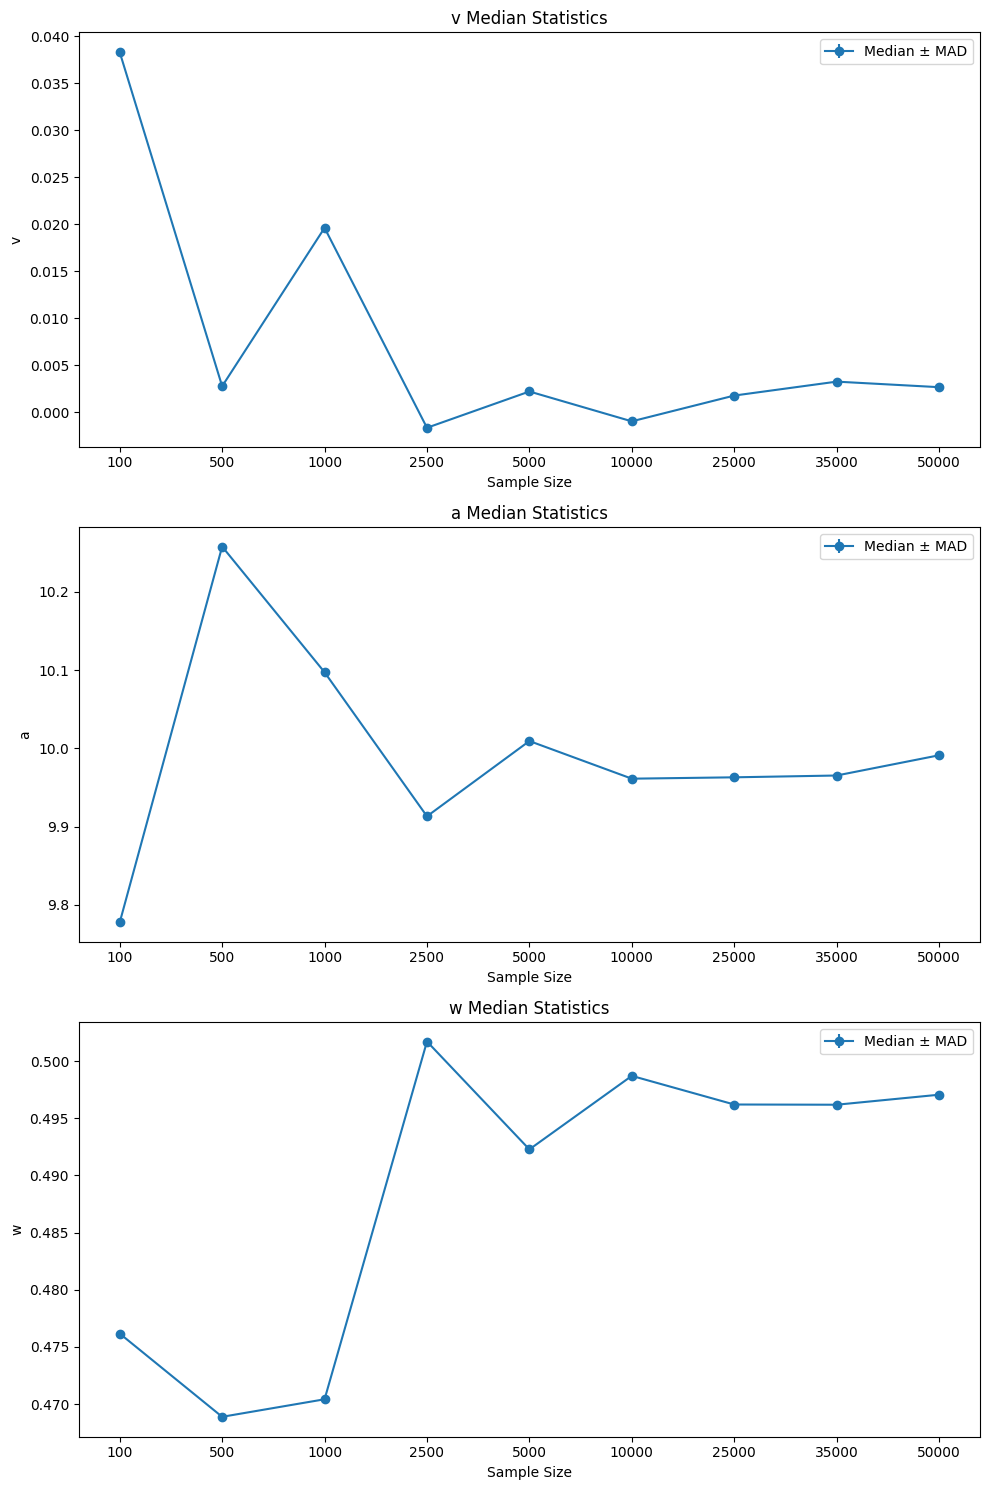

In [2]:
v = 0; a = 10

lb = np.array([-5,7, 0.1]); ub = np.array([5, 13, 0.9])
plb = np.array([-4,8,0.15]); pub = np.array([4,11,0.85])
N_sample_sizes = [100, 500, 1000, 2500, 5000, 10000, 25000, 35000, 50000]

bads_sim_results = {}
for n in N_sample_sizes:
    print(f"Processing {n}")
    sim_data_to_files_N(v,a,n)
    bads_sim_results[n] = bads_vs_N(lb,ub,plb,pub,n,v,a)

plot_bads_vs_N_median(bads_sim_results)

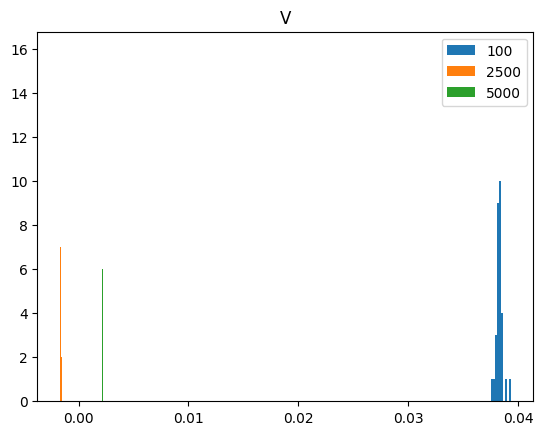

In [8]:
plt.hist(bads_sim_results[100][:,0]);plt.hist(bads_sim_results[2500][:,0]); plt.hist(bads_sim_results[5000][:,0]);
plt.legend(['100','2500','5000']);plt.title('V');


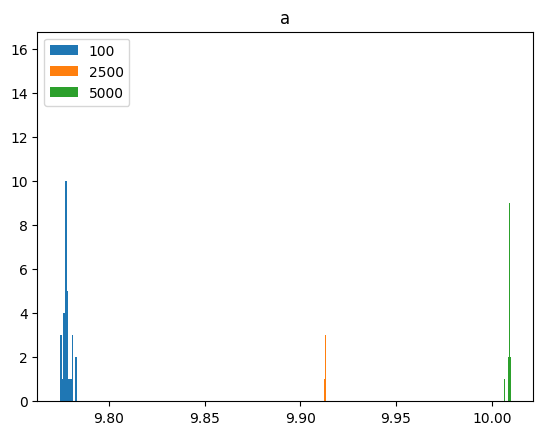

In [10]:
plt.hist(bads_sim_results[100][:,1]);plt.hist(bads_sim_results[2500][:,1]); plt.hist(bads_sim_results[5000][:,1]);
plt.legend(['100','2500','5000']);plt.title('a');


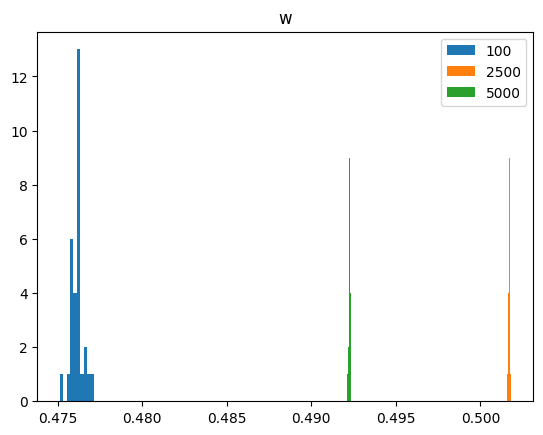

In [11]:
plt.hist(bads_sim_results[100][:,2]);plt.hist(bads_sim_results[2500][:,2]); plt.hist(bads_sim_results[5000][:,2]);
plt.legend(['100','2500','5000']);plt.title('w');


## Closer to ground values is obtained from sample size starting from 2500. But the difference seem not much between the N = 100 and N = 2500 case. In v its 0.04, in a its 0.3, in w its 0.03 

# Focus on narrow para

# Are other set of params really good? - checking by likelihood

In [3]:
# Save data to files first
v = 1; a = 2

lb = np.array([-10, 0.01, 0.45]); ub = np.array([10, 15, 0.55])
plb = np.array([-7,0.1,0.47]); pub = np.array([7,7,0.53])

n = 10000 
sim_data_to_files_N(v,a,n)
bads_N_result = bads_vs_N(lb,ub,plb,pub,n,v,a)

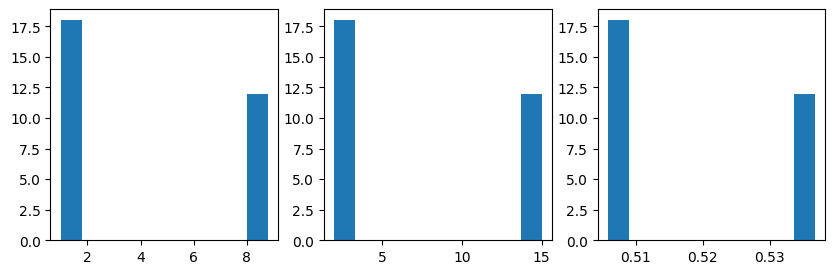

In [4]:
plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
plt.hist(bads_N_result[:,0]);
plt.subplot(1,3,2)
plt.hist(bads_N_result[:,1]);
plt.subplot(1,3,3)
plt.hist(bads_N_result[:,2]);

In [5]:
idx = bads_N_result[:,0] > 5
v_diff = bads_N_result[:,0][idx]
a_diff = bads_N_result[:,1][idx]
w_diff = bads_N_result[:,2][idx]


idx = bads_N_result[:,0] < 5
v_norm = bads_N_result[:,0][idx]
a_norm = bads_N_result[:,1][idx]
w_norm = bads_N_result[:,2][idx]

Text(0.5, 1.0, 'v vs w')

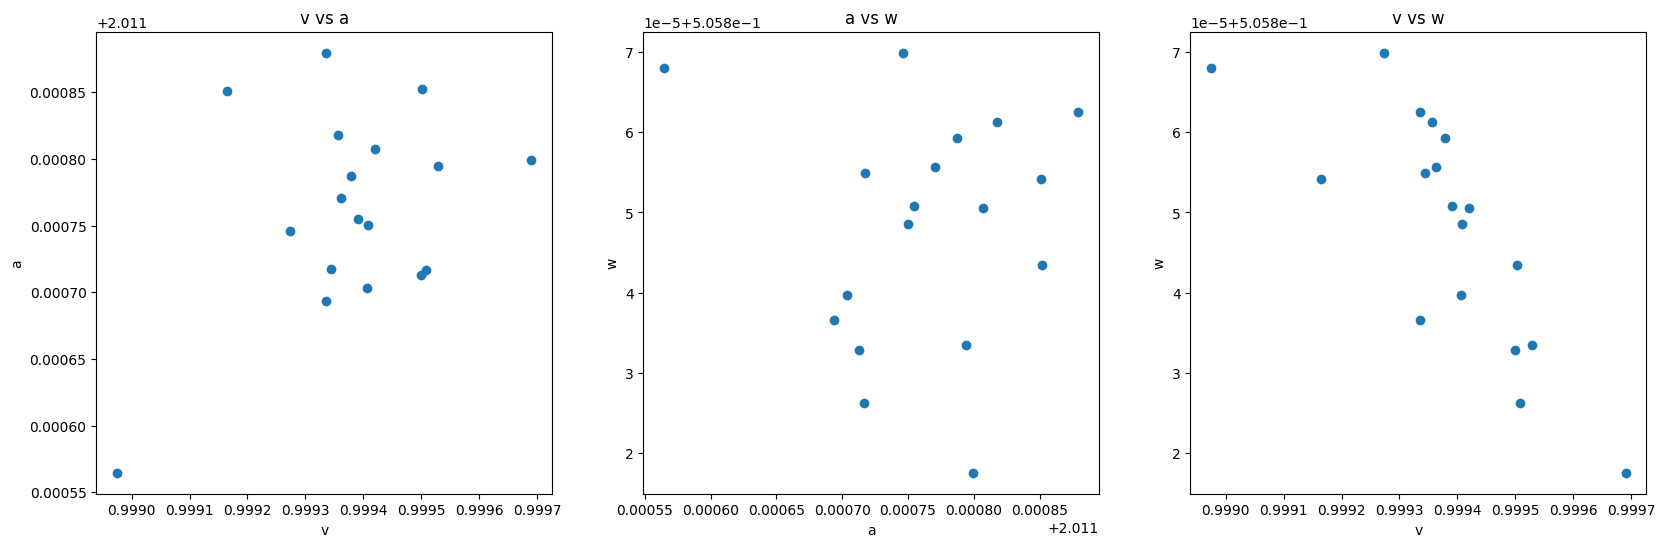

In [7]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
plt.scatter(v_norm, a_norm); plt.xlabel('v'); plt.ylabel('a'); plt.title('v vs a')
plt.subplot(1,3,2)
plt.scatter(a_norm, w_norm); plt.xlabel('a'); plt.ylabel('w'); plt.title('a vs w')
plt.subplot(1,3,3)
plt.scatter(v_norm, w_norm); plt.xlabel('v'); plt.ylabel('w'); plt.title('v vs w')

In [9]:
# range of v_norm, a_norm, w_norm
print("v_norm: ", np.max(v_norm), np.min(v_norm))
print("a_norm: ", np.max(a_norm), np.min(a_norm))
print("w_norm: ", np.max(w_norm), np.min(w_norm))

v_norm:  0.9996902495622635 0.9989748033694923
a_norm:  2.0118795646089978 2.011564620398236
w_norm:  0.5058699357509613 0.5058175083994866


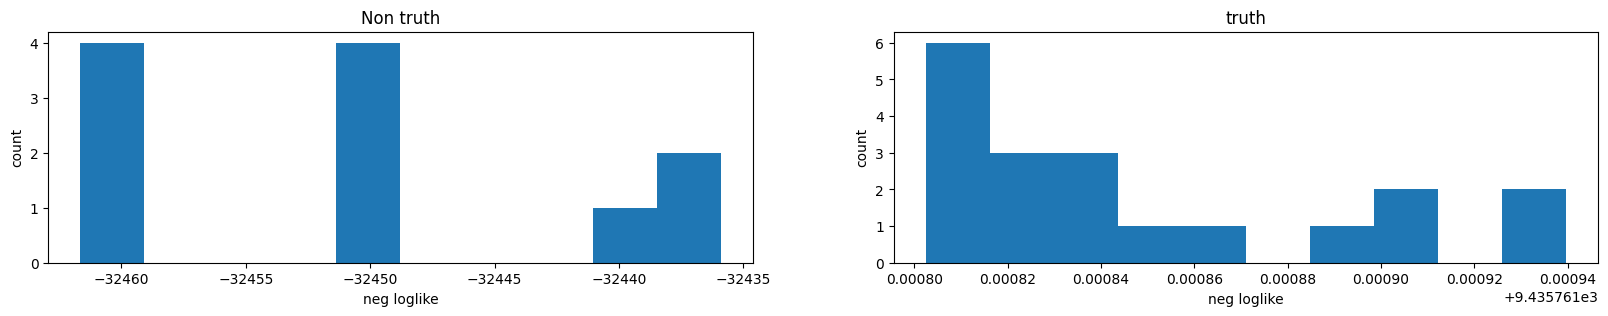

In [33]:
diff_loglike = [] for _v, _a, _w in zip(v_diff, a_diff, w_diff):
    diff_loglike.append(-1*bads_target_neg_loglike([_v, _a, _w]))


norm_loglike = []
for _v, _a, _w in zip(v_norm, a_norm, w_norm):
    norm_loglike.append(-1*bads_target_neg_loglike([_v, _a, _w]))

plt.figure(figsize=(20, 3))
plt.subplot(1, 2, 1)
plt.hist(diff_loglike);plt.xlabel('neg loglike'); plt.ylabel('count');plt.title('Non truth');
plt.subplot(1,2,2)
plt.hist(norm_loglike);plt.xlabel('neg loglike'); plt.ylabel('count');plt.title('truth');

In [43]:
norm_loglike = np.array(norm_loglike)
diff_loglike = np.array(diff_loglike)

print(f"Range of norm_loglike: {norm_loglike.min().item()} to {norm_loglike.max().item()}")
print(f"Range of diff_loglike: {diff_loglike.min().item()} to {diff_loglike.max().item()}")


Range of norm_loglike: 9435.761802408893 to 9435.76193969114
Range of diff_loglike: -32461.654508944528 to -32435.91681132903


# Seeing if initial point has any role in determining off-truths solution

In [68]:
def optimize_single(i, plb, pub, lb, ub, bads_target_neg_loglike, options):
    v0 = np.random.uniform(plb[0], pub[0])
    a0 = np.random.uniform(plb[1], pub[1])
    w0 = np.random.uniform(plb[2], pub[2])
    x0 = np.array([0.5*(plb[0]+pub[0]), 0.5*(plb[1]+pub[1]), 0.5*(plb[2]+pub[2])])

    bads = BADS(bads_target_neg_loglike, x0, lb, ub, plb, pub, options=options)
    optimize_result = bads.optimize()
    x_min = optimize_result['x']
    return x0, x_min

In [69]:
results = Parallel(n_jobs=-1)(
    delayed(optimize_single)(i, plb, pub, lb, ub, bads_target_neg_loglike,{'display': 'off'})
    for i in range(30)
)


bads:meshOverflow 	 The mesh attempted to expand above maximum size too many times. Try widening plausible_lower_bounds and plausible_upper_bounds.


In [70]:
# getting them
initial_pts = np.array([result[0] for result in results])
final_params = np.array([result[1] for result in results])

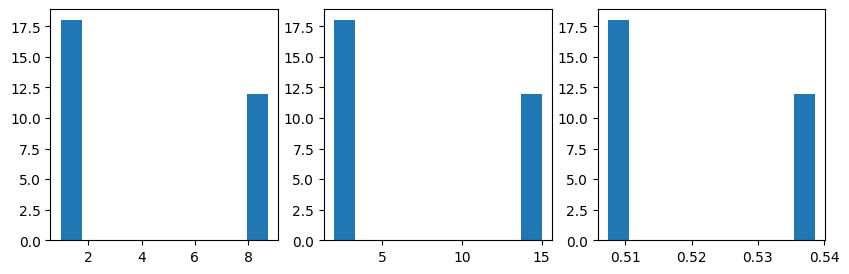

In [73]:
# plotting to see if there are non-truth points
plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
plt.hist(final_params[:,0]);
plt.subplot(1,3,2)
plt.hist(final_params[:,1]);
plt.subplot(1,3,3)
plt.hist(final_params[:,2]);

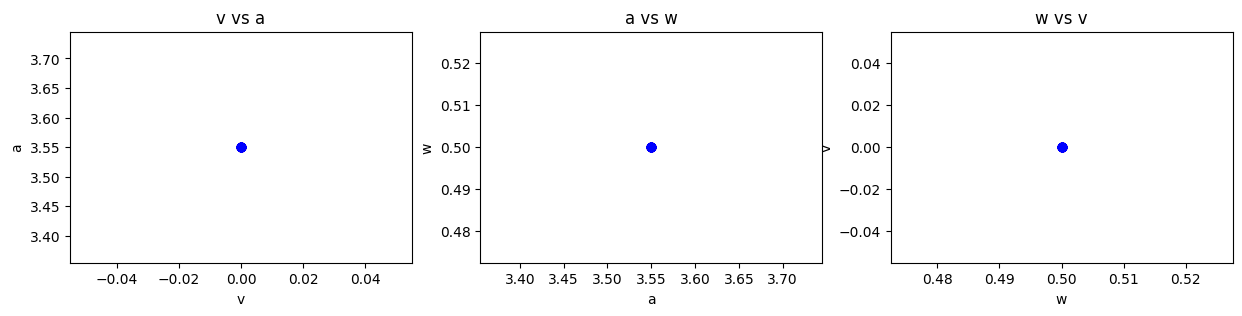

In [74]:
idx_false = final_params[:,0] > 5
idx_truth = final_params[:,0] < 5

init_v_false = initial_pts[idx_false, 0]
init_a_false = initial_pts[idx_false, 1]

init_v_true = initial_pts[idx_truth, 0]
init_a_true = initial_pts[idx_truth, 1]

plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
plt.scatter(init_v_false, init_a_false, color='red');
plt.scatter(init_v_true, init_a_true, color='blue');
plt.xlabel('v'); plt.ylabel('a'); plt.title('v vs a');

plt.subplot(1,3,2)
plt.scatter(initial_pts[idx_false, 1], initial_pts[idx_false, 2], color='red');
plt.scatter(initial_pts[idx_truth, 1], initial_pts[idx_truth, 2], color='blue');
plt.xlabel('a'); plt.ylabel('w'); plt.title('a vs w');

plt.subplot(1,3,3)
plt.scatter(initial_pts[idx_false, 2], initial_pts[idx_false, 0], color='red');
plt.scatter(initial_pts[idx_truth, 2], initial_pts[idx_truth, 0], color='blue');
plt.xlabel('w'); plt.ylabel('v'); plt.title('w vs v');

# Are MAD values correct?

In [75]:
v = 0; a = 2

lb = np.array([-5,7, 0.1]); ub = np.array([5, 13, 0.9])
plb = np.array([-4,8,0.15]); pub = np.array([4,11,0.85])
N_sample_sizes = [100, 500, 1000, 2500, 5000]

print(f"Processing {n}")
sim_data_to_files_N(v,a,n)
bads_500_result = bads_vs_N(lb,ub,plb,pub,n,v,a)

Processing 100
Processing 500
Processing 1000
Processing 2500
Processing 5000


In [79]:

def check_small(v,a,w,t,K_max):
    non_sum_term = (1/a**2)*(a**3/np.sqrt(2*np.pi*t**3))*np.exp(-v*a*w - (v**2 * t)/2)
    K_max = int(K_max/2)
    k_vals = np.linspace(-K_max, K_max, 2*K_max + 1)
    sum_w_term = w + 2*k_vals
    sum_exp_term = np.exp(-(a**2 * (w + 2*k_vals)**2)/(2*t))
    sum_result = np.sum(sum_w_term*sum_exp_term)

    # non_sum_term = (np.pi/a**2)*np.exp(-v*a*w - (v**2 * t/2))
    # k_vals = np.linspace(1, K_max, K_max)
    # sum_sine_term = np.sin(k_vals*np.pi*w)
    # sum_exp_term = np.exp(-(k_vals**2 * np.pi**2 * t)/(2*a**2))
    # sum_result = np.sum(k_vals * sum_sine_term * sum_exp_term)

    return non_sum_term*sum_result

In [92]:
a = 3; 
t_scale = (a**2)/4; dist_scale = a/2; v_scale = dist_scale/t_scale;

v = 1; w = 0.5; t = 2;

print(check_small(v,a,w,t,5))
print(check_small(v,a,w,t,10))

print(check_small(v,a,w,t/t_scale,10))
print(check_small(v,a,w,t*t_scale,10))



0.009565598615620438
0.009565598615620438
0.028811273738808145
0.000696184532558514
